Fanny Bleckur (12134033)<br>
Homework assignment 2

**Energy pathways**

The seventh goal of the SDGs is to seek clean energy for all (M.R Allen et al., 2018). Thus reductions in the main energy sources of today, oil, coal and gas need to be reduced (IPCC Working Group 2022). The question is then if renewable energy sources will be able to meet the energy demand? 

In [73]:
import numpy as np
import pyam
import matplotlib.pyplot as plt

In [74]:
# Load data into dataframe
df = pyam.IamDataFrame(data='AR6_Scenarios_Database_World_v1.0.csv')
df.info()

pyam.core - INFO: Reading file AR6_Scenarios_Database_World_v1.0.csv


"<class 'pyam.core.IamDataFrame'>\nIndex:\n * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (109)\n * scenario : 1, 1.5C, 1.5C A, 1.5C B, 1.5C C, ... peak2025_DemandLow_FossilLow_TechHigh (1026)\nTimeseries data coordinates:\n   region   : World (1)\n   variable : ... (1442)\n   unit     : %, EJ, EJ/yr, GW, GW/yr, GWh, GWh/yr, ... °C (72)\n   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)\nMeta indicators:\n   exclude (bool) False (1)"

In [139]:
# Create dataframes for each scenario for four variables
# Final energy demand
df_final_MESSAGEix_GLOBIOM = df.filter(
                                model="MESSAGEix-GLOBIOM 1.0",
                                scenario="LowEnergyDemand_1.3_IPCC",
                                region="World",
                                variable="Final Energy"
                                )
df_final_REMIND_MAgPIE_42 = df.filter(
                                model="REMIND-MAgPIE 2.1-4.2",
                                scenario="SusDev_SDP-PkBudg1000",
                                region="World",
                                variable="Final Energy"
                                )

df_final_REMIND_MAgPIE_43 = df.filter(
                                model="REMIND-MAgPIE 2.1-4.3",
                                scenario="DeepElec_SSP2_ HighRE_Budg900",
                                region="World",
                                variable="Final Energy"
                                )

df_final_COFFEE = df.filter(
                        model="COFFEE 1.1",
                        scenario="EN_NPi2020_400f_lowBECCS",
                        region="World",
                        variable="Final Energy"
                        )
# Primary Energy
df_primary_MESSAGEix_GLOBIOM = df.filter(
                                    model="MESSAGEix-GLOBIOM 1.0",
                                    scenario="LowEnergyDemand_1.3_IPCC",
                                    region="World",
                                    variable="Primary Energy"
                                    )
df_primary_REMIND_MAgPIE_42 = df.filter(
                                    model="REMIND-MAgPIE 2.1-4.2",
                                    scenario="SusDev_SDP-PkBudg1000",
                                    region="World",
                                    variable="Primary Energy"
                                    )

df_primary_REMIND_MAgPIE_43 = df.filter(
                                    model="REMIND-MAgPIE 2.1-4.3",
                                    scenario="DeepElec_SSP2_ HighRE_Budg900",
                                    region="World",
                                    variable="Primary Energy"
                                    )

df_primary_COFFEE = df.filter(
                            model="COFFEE 1.1",
                            scenario="EN_NPi2020_400f_lowBECCS",
                            region="World",
                            variable="Primary Energy"
                            )
# Primary energy Non-biomass renewables
df_primary_renewable_MESSAGEix_GLOBIOM = df.filter(
                                            model="MESSAGEix-GLOBIOM 1.0",
                                            scenario="LowEnergyDemand_1.3_IPCC",
                                            region="World",
                                            variable="Primary Energy|Non-Biomass Renewables"
                                            )
df_primary_renewable_REMIND_MAgPIE_42 = df.filter(
                                            model="REMIND-MAgPIE 2.1-4.2",
                                            scenario="SusDev_SDP-PkBudg1000",
                                            region="World",
                                            variable="Primary Energy|Non-Biomass Renewables"
                                            )

df_primary_renewable_REMIND_MAgPIE_43 = df.filter(
                                    model="REMIND-MAgPIE 2.1-4.3",
                                    scenario="DeepElec_SSP2_ HighRE_Budg900",
                                    region="World",
                                    variable="Primary Energy|Non-Biomass Renewables"
                                    )

df_primary_renewable_COFFEE = df.filter(
                                    model="COFFEE 1.1",
                                    scenario="EN_NPi2020_400f_lowBECCS",
                                    region="World",
                                    variable="Primary Energy|Non-Biomass Renewables"
                                    )

# Primary energy Fossil
df_primary_fossil_MESSAGEix_GLOBIOM = df.filter(
                                            model="MESSAGEix-GLOBIOM 1.0",
                                            scenario="LowEnergyDemand_1.3_IPCC",
                                            region="World",
                                            variable="Primary Energy|Fossil"
                                            )
df_primary_fossil_REMIND_MAgPIE_42 = df.filter(
                                        model="REMIND-MAgPIE 2.1-4.2",
                                        scenario="SusDev_SDP-PkBudg1000",
                                        region="World",
                                        variable="Primary Energy|Fossil"
                                        )

df_primary_fossil_REMIND_MAgPIE_43 = df.filter(
                                        model="REMIND-MAgPIE 2.1-4.3",
                                        scenario="DeepElec_SSP2_ HighRE_Budg900",
                                        region="World",
                                        variable="Primary Energy|Fossil"
                                        )

df_primary_fossil_COFFEE = df.filter(
                                model="COFFEE 1.1",
                                scenario="EN_NPi2020_400f_lowBECCS",
                                region="World",
                                variable="Primary Energy|Fossil"
                                )

# Concatenate all scenarios connected to one variable in its own dataframe
df_final = pyam.concat([df_final_MESSAGEix_GLOBIOM, df_final_REMIND_MAgPIE_42, df_final_REMIND_MAgPIE_43, df_final_COFFEE])
df_primary = pyam.concat([df_primary_MESSAGEix_GLOBIOM, df_primary_REMIND_MAgPIE_42, df_primary_REMIND_MAgPIE_43, df_primary_COFFEE])
df_primary_renewables = pyam.concat([df_primary_renewable_MESSAGEix_GLOBIOM, df_primary_renewable_REMIND_MAgPIE_42, df_primary_renewable_REMIND_MAgPIE_43, df_primary_renewable_COFFEE])
df_primary_fossil = pyam.concat([df_primary_fossil_MESSAGEix_GLOBIOM, df_primary_fossil_REMIND_MAgPIE_42, df_primary_fossil_REMIND_MAgPIE_43, df_primary_fossil_COFFEE])

When displaying the final energy demand and primary energy in the period 2010-2100 based on data from the AR6 Scenario Explorer (D. Huppmann et al., 2018), we can observe that in all four scenarios included here, the final energy demand is met by the primary energy. This data include all types of energy sources, such as fossil, renewable, nuclear, hydro, gas, wind etc. The four scenarios included are the two most extreme cases, MESSAGEix-GLOBIOM 1.0 | LowEnergyDemand_1.3_IPCC and COFFEE 1.1 | EN_NPi2020_400f_lowBECCS and two middle-scenarios but with different trends in the final energy demand.

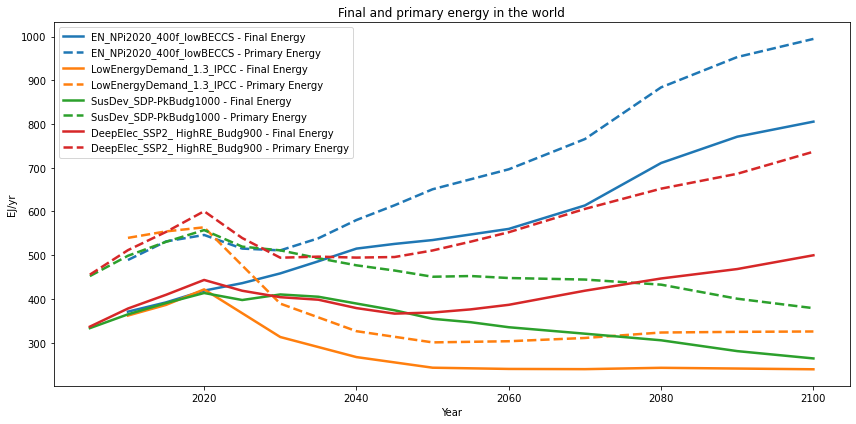

In [140]:
# Plot and compare final demand vs primary energy supply
final_primary = pyam.concat([df_final, df_primary])
final_primary.plot(figsize=(12,6), color='scenario', linestyle='variable', linewidth=2.5)
plt.legend(loc="upper left")
plt.title('Final and primary energy in the world')
plt.show()

Restricting the data to only show renewable primary energy, the pathways for energy demand is not met for any of the scenarious until the late 2050s. Only one scenario, REMIND-MAgPIE 2.1-4.3 | DeepElec_SSp2_HighRE_Budg900, shows that renewable energy (without bio-mass) sources can meet the final energy demand, based on the same model.

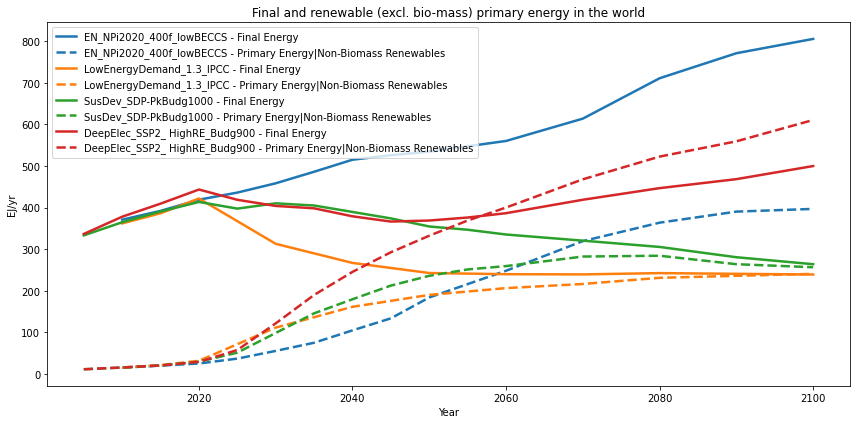

In [141]:
# Plot and compare final demand vs renewable primary energy supply
final_primary = pyam.concat([df_final, df_primary_renewables])
final_primary.plot(figsize=(12,6), color='scenario', linestyle='variable', linewidth=2.5)
plt.legend(loc="upper left")
plt.title('Final and renewable (excl. bio-mass) primary energy in the world')
plt.show()

At the same time, if we look at the fossil primary energy, the four scenarios show that fossil primary energy will be unable to satify demands by the late 2020s. 

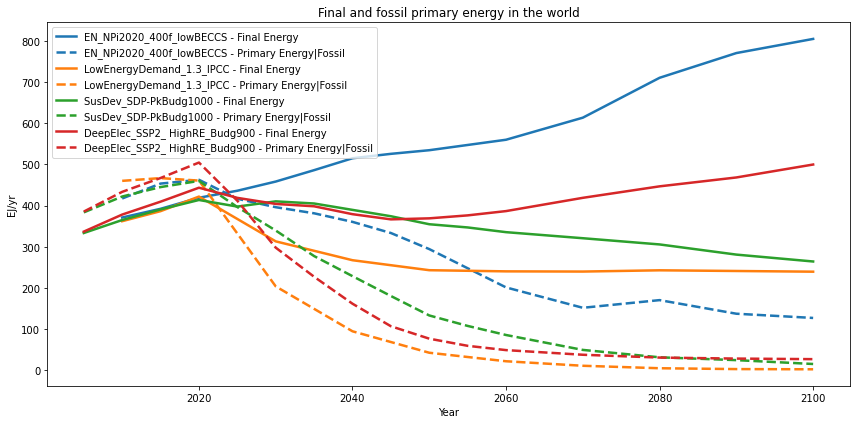

In [142]:
# Plot and compare final demand vs fossil primary energy supply
final_primary = pyam.concat([df_final, df_primary_fossil])
final_primary.plot(figsize=(12,6), color='scenario', linestyle='variable', linewidth=2.5)
plt.legend(loc="upper left")
plt.title('Final and fossil primary energy in the world')
plt.show()

Displaying scenarios that only include renewable and fossil fuel based energy sources respectively, show a clear gap in fulfilling the demand in the period 2030-2050 for all scenarios, but an even longer period if REMIND-MAgPIE 2.1-4.3 | DeepElec_SSp2_HighRE_Budg900 would be excluded. In the first figure we could see that the energy demand is fulfilled for the whole century if all energy sources are included. But as the fossil fuel based energy sources must be reduced, a significant shift in energy supply is required.

In the latest IPCC report, the authors state that it requires electrification, hydrogen, bio-based feedstocks and substitution, and also carbon dioxide capture, utilization and storage to limit the warming to 1.5$^{\circ}$C (de Coninck, 2021). A problem is that these transitions require institutional changes, technical knowledge and finances (de Coninck, 2021). So the first step is to make the energy industry more efficient. A main focus should be to improve the systems that are already in use and lower energy-use.

**References**

Allen, M.R., O.P. Dube, W. Solecki, F. Aragón-Durand, W. Cramer, S. Humphreys, M. Kainuma, J. Kala, N. Mahowald, Y. Mulugetta, R. Perez, M. Wairiu, and K. Zickfeld, 2018: Framing and Context. In: Global Warming of 1.5°C. An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change, sustainable development, and efforts to eradicate poverty [Masson-Delmotte, V., P. Zhai, H.-O. Pörtner, D. Roberts, J. Skea, P.R. Shukla, A. Pirani, W. Moufouma-Okia, C. Péan, R. Pidcock, S. Connors, J.B.R. Matthews, Y. Chen, X. Zhou, M.I. Gomis, E. Lonnoy, T. Maycock, M. Tignor, and T. Waterfield (eds.)]. In Press.

IPCC Working Group III, "The evidence is clear: the time for action is now. We can halve emissions by 2030.", April 4, 2022, https://www.ipcc.ch/2022/04/04/ipcc-ar6-wgiii-pressrelease/, accessed May 27 2022

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al. (2018)
IAMC 1.5°C Scenario Explorer and Data hosted by IIASA. doi: 10.22022/SR15/08-2018.15429

de Coninck, H., A. Revi, M. Babiker, P. Bertoldi, M. Buckeridge, A. Cartwright, W. Dong, J. Ford, S. Fuss, J.-C. Hourcade, D. Ley, R. Mechler, P. Newman, A. Revokatova, S. Schultz, L. Steg, and T. Sugiyama, 2018: Strengthening and Implementing the Global Response. In: Global Warming of 1.5°C. An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change, sustainable development, and efforts to eradicate poverty [Masson-Delmotte, V., P. Zhai, H.-O. Pörtner, D. Roberts, J. Skea, P.R. Shukla, A. Pirani, W. Moufouma-Okia, C. Péan, R. Pidcock, S. Connors, J.B.R. Matthews, Y. Chen, X. Zhou, M.I. Gomis, E. Lonnoy, T. Maycock, M. Tignor, and T. Waterfield (eds.)]. In Press.